In [1]:
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
train_dict = {
    "BRAIN0": {
        "chrXY": {
            "mean_auc": 0.980161051070142,
            "mean_accuracy": 0.9325889350241274,
            "mean_f1": 0.9343321515036773,
            "mean_precision": 0.9057672648349403,
            "mean_recall": 0.9665268065268066
        },
        "chrX": {
            "mean_auc": 0.9803131548586095,
            "mean_accuracy": 0.9325777129390641,
            "mean_f1": 0.9343477878520549,
            "mean_precision": 0.9067194046585696,
            "mean_recall": 0.9664801864801866
        },
        "chrY": {
            "mean_auc": 0.8916069788797062,
            "mean_accuracy": 0.8064975872517113,
            "mean_f1": 0.800554426377597,
            "mean_precision": 0.8130499266495785,
            "mean_recall": 0.7899766899766899
        },
        "autosome": {
            "mean_auc": 0.8852383979656706,
            "mean_accuracy": 0.7931096397710695,
            "mean_f1": 0.7837599353722486,
            "mean_precision": 0.8085456681809747,
            "mean_recall": 0.7627039627039626
        }
    },
    "HEART": {
        "chrXY": {
            "mean_auc": 0.9939139648230557,
            "mean_accuracy": 0.9925036471776456,
            "mean_f1": 0.9923422123704295,
            "mean_precision": 0.9970149253731343,
            "mean_recall": 0.987832167832168
        },
        "chrX": {
            "mean_auc": 0.9935829154010971,
            "mean_accuracy": 0.9925036471776456,
            "mean_f1": 0.9923192542116739,
            "mean_precision": 1.0,
            "mean_recall": 0.9848018648018648
        },
        "chrY": {
            "mean_auc": 0.8765199783381602,
            "mean_accuracy": 0.8005947705083605,
            "mean_f1": 0.7974814841192874,
            "mean_precision": 0.8042393480025265,
            "mean_recall": 0.7932400932400931
        },
        "autosome": {
            "mean_auc": 0.865660803842622,
            "mean_accuracy": 0.7855796206935248,
            "mean_f1": 0.7812424951556749,
            "mean_precision": 0.7892133001490087,
            "mean_recall": 0.7751048951048951
        }
    },
    "BRAIN1": {
        "chrXY": {
            "mean_auc": 0.9946109109745473,
            "mean_accuracy": 0.9864773874985971,
            "mean_f1": 0.9861411917864963,
            "mean_precision": 0.9907647907647907,
            "mean_recall": 0.9817715617715617
        },
        "chrX": {
            "mean_auc": 0.9944225471498198,
            "mean_accuracy": 0.9895073504657166,
            "mean_f1": 0.9892414290248481,
            "mean_precision": 0.9969696969696968,
            "mean_recall": 0.9817715617715617
        },
        "chrY": {
            "mean_auc": 0.9936855546589247,
            "mean_accuracy": 0.9895073504657166,
            "mean_f1": 0.989382373351839,
            "mean_precision": 0.990909090909091,
            "mean_recall": 0.9878787878787879
        },
        "autosome": {
            "mean_auc": 0.8760928633655906,
            "mean_accuracy": 0.805106048703849,
            "mean_f1": 0.7993517132105368,
            "mean_precision": 0.8089890163876898,
            "mean_recall": 0.7929603729603729
        }
    },
    "None": {
        "chrXY": {
            "mean_auc": 0.9923990440060229,
            "mean_accuracy": 0.9864773874985971,
            "mean_f1": 0.9860443175245808,
            "mean_precision": 0.9937891189215214,
            "mean_recall": 0.9787878787878788
        },
        "chrX": {
            "mean_auc": 0.9937932550053762,
            "mean_accuracy": 0.9925036471776456,
            "mean_f1": 0.9923422123704295,
            "mean_precision": 0.9970149253731343,
            "mean_recall": 0.987832167832168
        },
        "chrY": {
            "mean_auc": 0.9896422192731054,
            "mean_accuracy": 0.9834698687016047,
            "mean_f1": 0.9830602866900076,
            "mean_precision": 0.9879506641366224,
            "mean_recall": 0.9787878787878788
        },
        "autosome": {
            "mean_auc": 0.9073659673659673,
            "mean_accuracy": 0.8320278307709573,
            "mean_f1": 0.8313231327016455,
            "mean_precision": 0.8246070846232844,
            "mean_recall": 0.841864801864802
        }
    }
}

In [3]:
eval_dict = {
    "BRAIN0": {
        "chrXY": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.9,
            "mean_f1": 0.92672679617638,
            "mean_precision": 1.0,
            "mean_recall": 0.8640000000000001
        },
        "chrX": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.9176470588235294,
            "mean_f1": 0.9406028368794326,
            "mean_precision": 1.0,
            "mean_recall": 0.8880000000000001
        },
        "chrY": {
            "mean_auc": 0.6609696969696971,
            "mean_accuracy": 0.5941176470588235,
            "mean_f1": 0.6516943521594685,
            "mean_precision": 0.8702777777777777,
            "mean_recall": 0.528
        },
        "autosome": {
            "mean_auc": 0.6857777777777777,
            "mean_accuracy": 0.6,
            "mean_f1": 0.6596054467684764,
            "mean_precision": 0.8724557434309756,
            "mean_recall": 0.536
        }
    },
    "HEART": {
        "chrXY": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.9700000000000001,
            "mean_f1": 0.968421052631579,
            "mean_precision": 0.9400000000000001,
            "mean_recall": 1.0
        },
        "chrX": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.99,
            "mean_f1": 0.9894736842105264,
            "mean_precision": 0.9800000000000001,
            "mean_recall": 1.0
        },
        "chrY": {
            "mean_auc": 0.3262626262626262,
            "mean_accuracy": 0.43,
            "mean_f1": 0.30918964076858807,
            "mean_precision": 0.3431746031746032,
            "mean_recall": 0.28888888888888886
        },
        "autosome": {
            "mean_auc": 0.3828282828282828,
            "mean_accuracy": 0.5,
            "mean_f1": 0.3555555555555555,
            "mean_precision": 0.4222222222222222,
            "mean_recall": 0.31111111111111106
        }
    },
    "BRAIN1": {
        "chrXY": {
            "mean_auc": 0.9748552188552189,
            "mean_accuracy": 0.7386046511627906,
            "mean_f1": 0.7692246249220479,
            "mean_precision": 1.0,
            "mean_recall": 0.6253333333333333
        },
        "chrX": {
            "mean_auc": 0.9071784511784511,
            "mean_accuracy": 0.3693023255813953,
            "mean_f1": 0.1650782724446349,
            "mean_precision": 0.6,
            "mean_recall": 0.096
        },
        "chrY": {
            "mean_auc": 0.9791111111111112,
            "mean_accuracy": 0.6706976744186046,
            "mean_f1": 0.6887986198136304,
            "mean_precision": 1.0,
            "mean_recall": 0.528
        },
        "autosome": {
            "mean_auc": 0.5111649831649832,
            "mean_accuracy": 0.4576744186046512,
            "mean_f1": 0.5093544931152222,
            "mean_precision": 0.6905217584336483,
            "mean_recall": 0.404
        }
    }
}

In [4]:
# # TOTAL, HEART, BRAIN0, BRAIN1
# TOTAL_df = pd.DataFrame.from_dict(TOTAL)
# HEART_df = pd.DataFrame.from_dict(HEART)
# # BLOOD1_df = pd.DataFrame.from_dict(BLOOD1)
# BRAIN0_df = pd.DataFrame.from_dict(BRAIN0)
# BRAIN1_df = pd.DataFrame.from_dict(BRAIN1)
# TOTAL_df

TOTAL_df = pd.DataFrame.from_dict(train_dict['None'])
HEART_df = pd.DataFrame.from_dict(train_dict['HEART'])
BRAIN0_df = pd.DataFrame.from_dict(train_dict['BRAIN0'])
BRAIN1_df = pd.DataFrame.from_dict(train_dict['BRAIN1'])

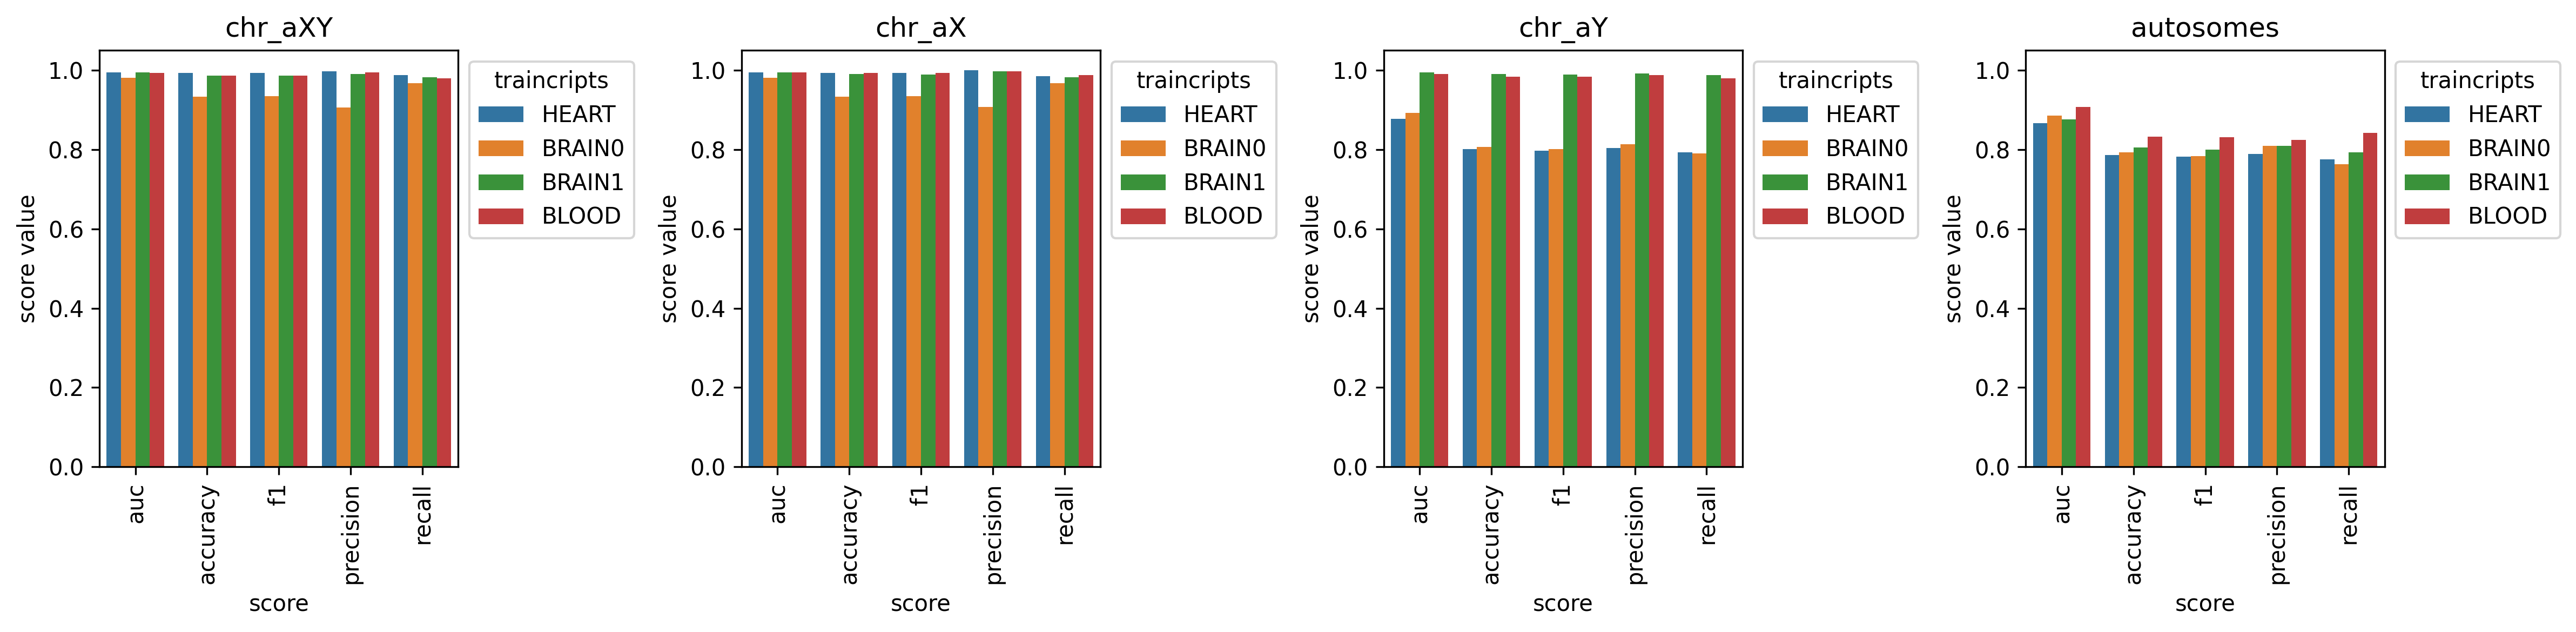

In [32]:
sex_chromosome_names = {
    'chrXY': 'chr_aXY',
    'autosome': "autosomes",
    'chrX': "chr_aX",
    'chrY': "chr_aY"
}

organ_names = {
    'BRAIN0': "BRAIN0",
    "HEART": "HEART",
    "BRAIN1": "BRAIN1",
    'None': "BLOOD"
}


fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 4)), 
        columns=("BLOOD", 'HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['HEART']=HEART_df[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_df[chromosome]
    dset['BRAIN1']=BRAIN1_df[chromosome]
    dset['BLOOD']=TOTAL_df[chromosome]

    dset['score'] = dset.index.str[5:]


    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                hue_order=['HEART', 'BRAIN0', 'BRAIN1', 'BLOOD'],
                ax=ax)
    g.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(sex_chromosome_names[chromosome])

    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')

plt.savefig('../reports/for_paper/train_sex_scores.pdf', dpi=300)

In [6]:

# HEART_eval_df = pd.DataFrame.from_dict(HEART_eval)
# BRAIN0_eval_df = pd.DataFrame.from_dict(BRAIN0_eval)
# BRAIN1_eval_df = pd.DataFrame.from_dict(BRAIN1_eval)


HEART_eval_df = pd.DataFrame.from_dict(eval_dict['HEART'])
BRAIN0_eval_df = pd.DataFrame.from_dict(eval_dict['BRAIN0'])
BRAIN1_eval_df = pd.DataFrame.from_dict(eval_dict['BRAIN1'])


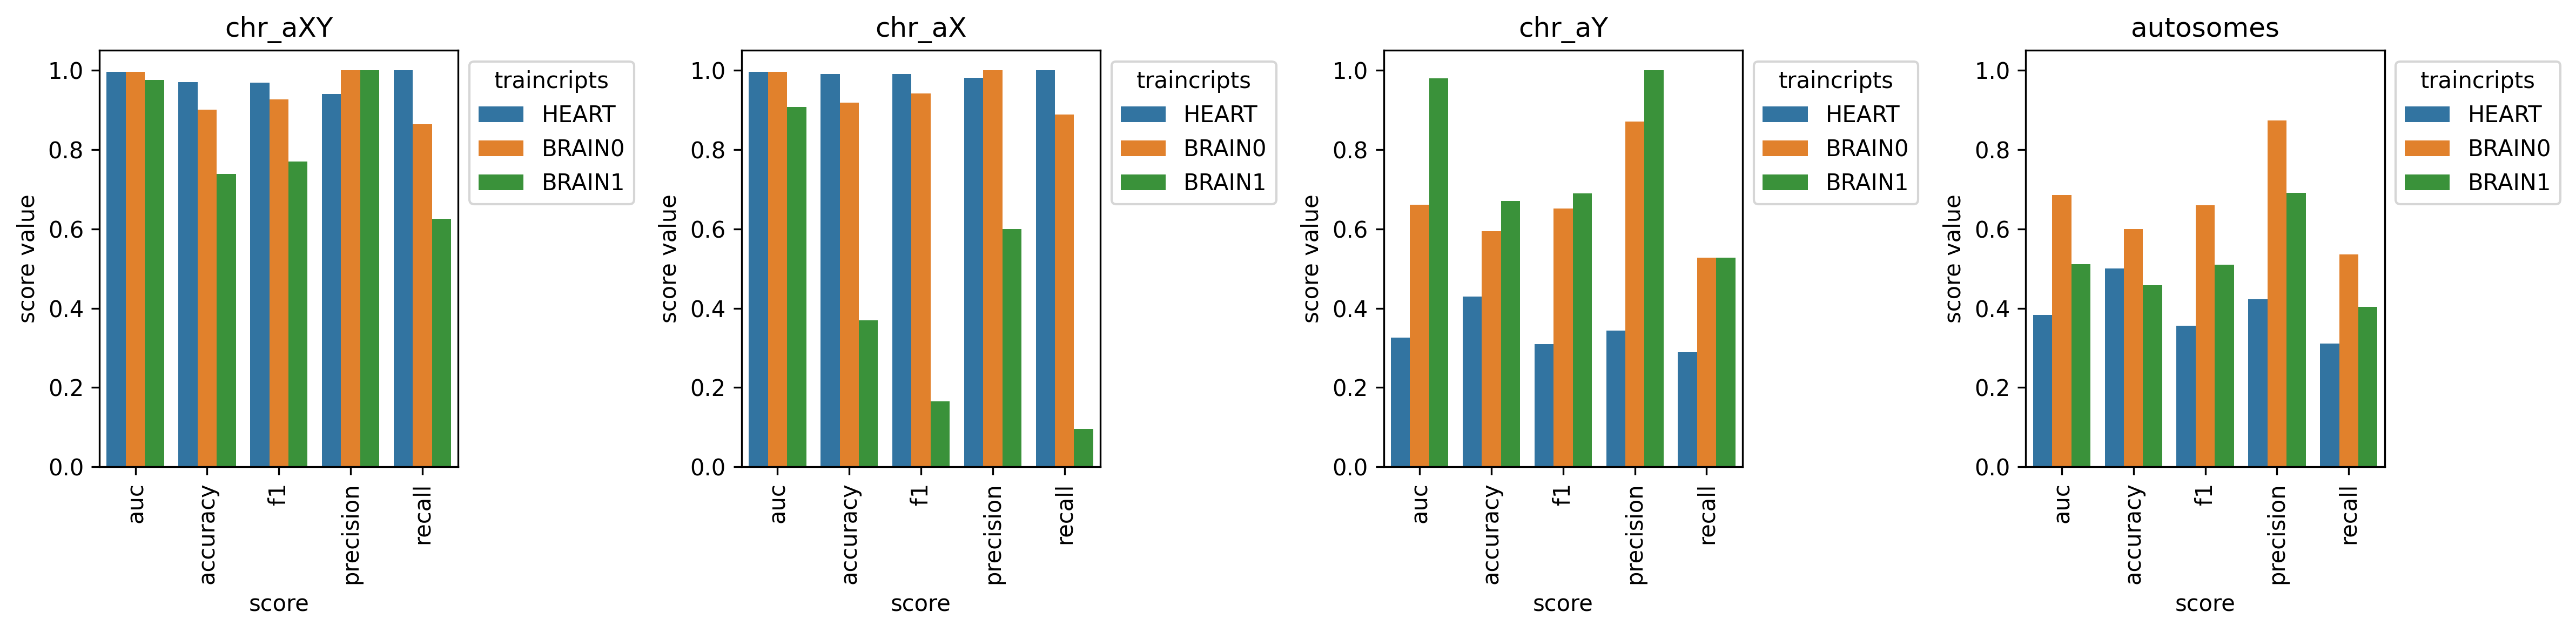

In [36]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

chromosome = 'chrXY'
for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 3)), 
        columns=('HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['HEART']=HEART_eval_df[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_eval_df[chromosome]
    dset['BRAIN1']=BRAIN1_eval_df[chromosome]

    dset['score'] = dset.index.str[5:]


    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                hue_order=['HEART', 'BRAIN0', 'BRAIN1'],
                ax=ax)
    g.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(sex_chromosome_names[chromosome])
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')
plt.savefig('../reports/for_paper/eval_sex_scores.pdf', dpi=300)

In [8]:
## на 50 транскриптах

BLOOD1_50 = dict(
    chrXY = dict(
        mean_auc=0.9415219797037979,
        mean_accuracy=0.8995398945124004,
        mean_f1=0.9013116086450619,
        mean_precision=0.8732248342374923,
        mean_recall=0.9358974358974359,
),
    chrX = dict(
        mean_auc=0.9483713592804501,
        mean_accuracy=0.9040399506228258,
        mean_f1=0.9063514804475666,
        mean_precision=0.8740152681098576,
        mean_recall=0.9451282051282052,
        ),
    chrY = dict(
        mean_auc=0.5755918155918156,
        mean_accuracy=0.5622152395915161,
        mean_f1=0.5692593605588699,
        mean_precision=0.5535460970953927,
        mean_recall=0.5898834498834498,
        ),
    autosome = dict(
        mean_auc=0.7030773939864847,
        mean_accuracy=0.640141398271799,
        mean_f1=0.6511144904471828,
        mean_precision=0.626112407087076,
        mean_recall=0.684102564102564,
        ),
)

BRAIN0_50 = dict(
    chrXY = dict(
        mean_auc=0.912887381978291,
        mean_accuracy=0.8935360790034789,
        mean_f1=0.8964017885814078,
        mean_precision=0.8627594302718335,
        mean_recall=0.935990675990676,
        ),
    chrX = dict(
        mean_auc=0.9680454898636717,
        mean_accuracy=0.9100662103018742,
        mean_f1=0.9115058744817095,
        mean_precision=0.8867738071660949,
        mean_recall=0.9420979020979022,
        ),
    chrY = dict(
        mean_auc=0.5407299098208189,
        mean_accuracy=0.5174727864437212,
        mean_f1=0.5088423447620629,
        mean_precision=0.5080825217541636,
        mean_recall=0.5138927738927739,
        ),
    autosome = dict(
        mean_auc=0.8621336912246003,
        mean_accuracy=0.7825159914712153,
        mean_f1=0.7783659608134235,
        mean_precision=0.7799722079258878,
        mean_recall=0.7808857808857809,
        ),
)

HEART_50 = dict(
    chrXY = dict(
        mean_auc=0.9943947634856726,
        mean_accuracy=0.9849624060150376,
        mean_f1=0.984541087929748,
        mean_precision=0.9877285128609152,
        mean_recall=0.9817715617715617,
        ),
    chrX = dict(
        mean_auc=0.9939285630194721,
        mean_accuracy=0.9879699248120299,
        mean_f1=0.9876673795400845,
        mean_precision=0.990763399121608,
        mean_recall=0.9848018648018648,
        ),
    chrY = dict(
        mean_auc=0.4694704621977349,
        mean_accuracy=0.4844349680170576,
        mean_f1=0.49274410032830335,
        mean_precision=0.473360474869606,
        mean_recall=0.5200932400932401,
        ),
    autosome = dict(
        mean_auc=0.8464858373949283,
        mean_accuracy=0.7765682863876109,
        mean_f1=0.772562099734364,
        mean_precision=0.7743343573988735,
        mean_recall=0.7719813519813519,
        ),
)
BRAIN1_50 = dict(
    chrXY = dict(
        mean_auc=0.994949494949495,
        mean_accuracy=0.9954999438895747,
        mean_f1=0.9955111659746381,
        mean_precision=0.9911325724319578,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_auc=0.9935009771373408,
        mean_accuracy=0.9849624060150376,
        mean_f1=0.984541087929748,
        mean_precision=0.9877285128609152,
        mean_recall=0.9817715617715617,
        ),
    chrY = dict(
        mean_auc=0.9931129476584022,
        mean_accuracy=0.992514869262709,
        mean_f1=0.992434242897715,
        mean_precision=0.9911325724319578,
        mean_recall=0.9939393939393939,
        ),
    autosome = dict(
        mean_auc=0.8623178168632714,
        mean_accuracy=0.7750196386488609,
        mean_f1=0.7743612113855468,
        mean_precision=0.7641870628032634,
        mean_recall=0.7870396270396272,
        ),
)

TOTAL_50 = dict(
    chrXY = dict(
        mean_auc=0.994949494949495,
        mean_accuracy=0.9954887218045112,
        mean_f1=0.9955555555555555,
        mean_precision=0.9913043478260869,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_auc=0.9940227449318358,
        mean_accuracy=0.9879699248120299,
        mean_f1=0.9876660879297481,
        mean_precision=0.9909543193125282,
        mean_recall=0.9848018648018648,
        ),
    chrY = dict(
        mean_auc=0.9926349506698451,
        mean_accuracy=0.990988665694086,
        mean_f1=0.9909746910029081,
        mean_precision=0.9883192731992212,
        mean_recall=0.9938927738927739,
        ),
    autosome = dict(
        mean_auc=0.8796915542370087,
        mean_accuracy=0.8110313096173268,
        mean_f1=0.8154365935478408,
        mean_precision=0.7858759172175651,
        mean_recall=0.847972027972028,
        ),
)

# TOTAL = dict(
#     chrXY = dict(),
#     chrX = dict(),
#     chrY = dict(),
#     autosome = dict(),
# )

In [9]:
TOTAL_df_50 = pd.DataFrame.from_dict(TOTAL_50)
HEART_df_50 = pd.DataFrame.from_dict(HEART_50)
BLOOD1_df_50 = pd.DataFrame.from_dict(BLOOD1_50)
BRAIN0_df_50 = pd.DataFrame.from_dict(BRAIN0_50)
BRAIN1_df_50 = pd.DataFrame.from_dict(BRAIN1_50)
TOTAL_df_50

,chrXY,chrX,chrY,autosome
mean_auc,0.994949,0.994023,0.992635,0.879692
mean_accuracy,0.995489,0.987970,0.990989,0.811031
mean_f1,0.995556,0.987666,0.990975,0.815437
mean_precision,0.991304,0.990954,0.988319,0.785876
mean_recall,1.000000,0.984802,0.993893,0.847972


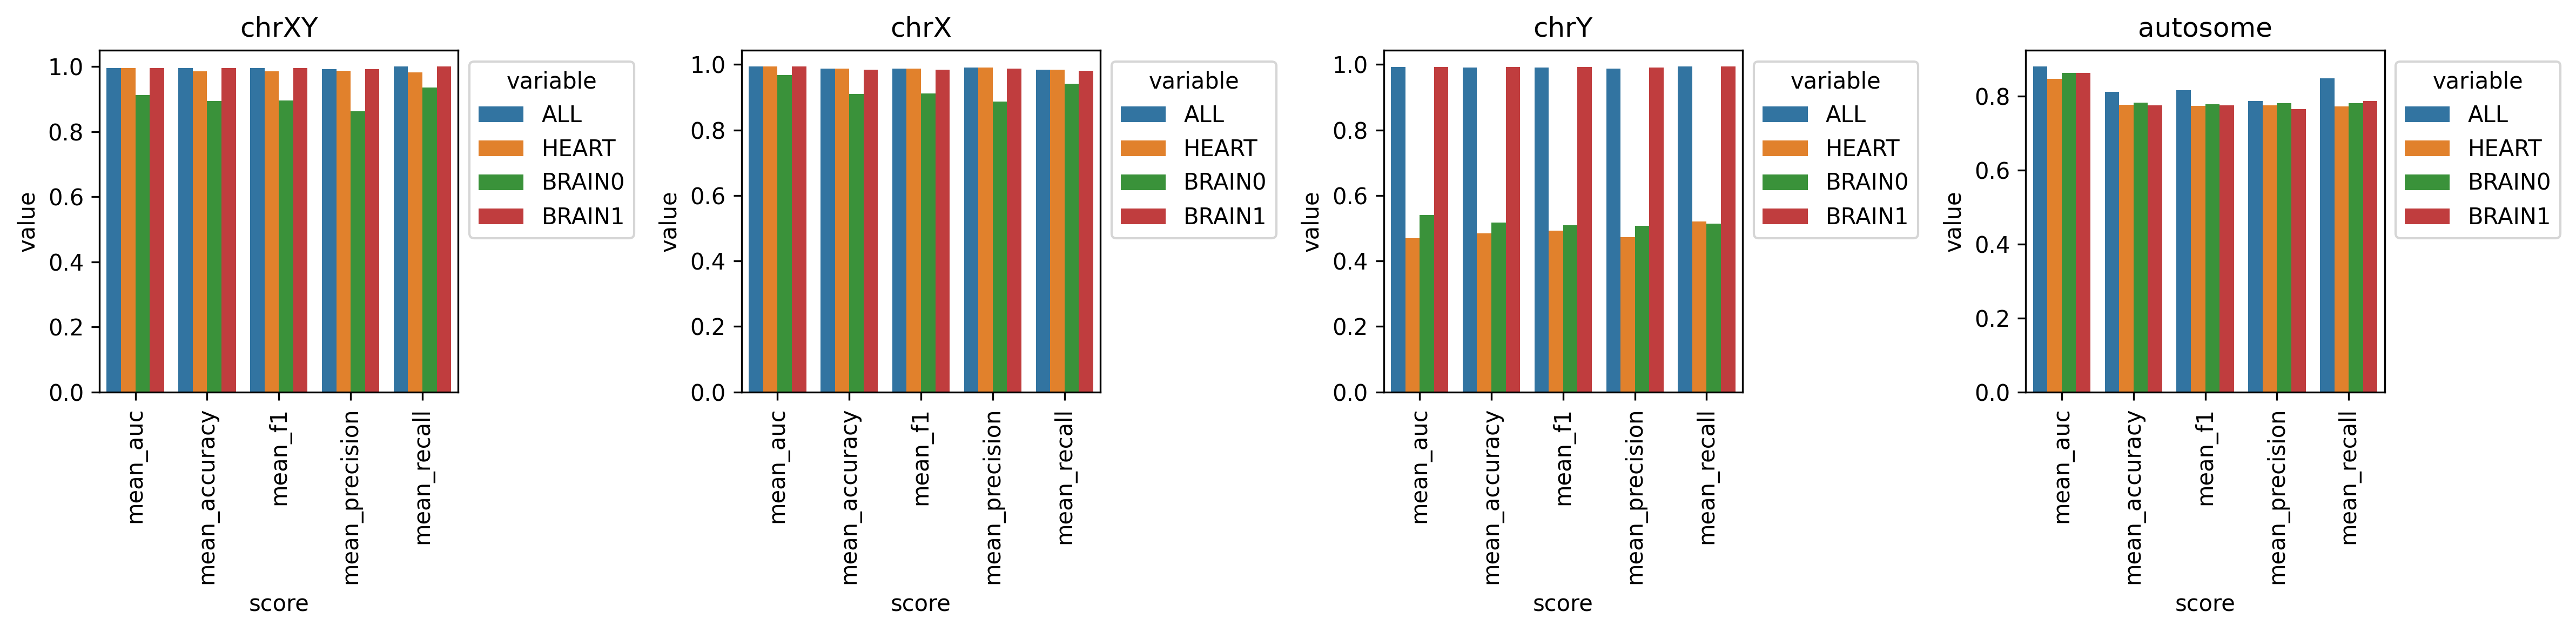

In [10]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 4)), 
        columns=("ALL", 'HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['ALL']=TOTAL_df_50[chromosome]
    dset['HEART']=HEART_df_50[chromosome]
    dset['BRAIN0']=BRAIN0_df_50[chromosome]
    dset['BRAIN1']=BRAIN1_df_50[chromosome]

    dset['score'] = dset.index


    sns.barplot(dset.melt('score'), x='score', y='value', hue='variable',
                ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(chromosome)
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')

In [11]:
BRAIN0_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=0.2941176470588235,
        mean_f1=0.06666666666666667,
        mean_precision=0.2,
        mean_recall=0.04,
        ),
    chrX = dict(
        mean_accuracy=0.27647058823529413,
        mean_f1=0.029629629629629627,
        mean_precision=0.2,
        mean_recall=0.016,
        ),
    chrY = dict(
        mean_accuracy=0.4882352941176471,
        mean_f1=0.5545328992360894,
        mean_precision=0.7657976010917187,
        mean_recall=0.44800000000000006,
        ),
    autosome = dict(
        mean_accuracy=0.6411764705882353,
        mean_f1=0.7352857465134457,
        mean_precision=0.8032046024151288,
        mean_recall=0.68,
        ),
)

HEART_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=1.0,
        mean_f1=1.0,
        mean_precision=1.0,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_accuracy=1.0,
        mean_f1=1.0,
        mean_precision=1.0,
        mean_recall=1.0,
        ),
    chrY = dict(
        mean_accuracy=0.57,
        mean_f1=0.5907276095376781,
        mean_precision=0.5205328005328005,
        mean_recall=0.6888888888888889,
        ),
    autosome = dict(
        mean_accuracy=0.39,
        mean_f1=0.4170995670995671,
        mean_precision=0.36783216783216777,
        mean_recall=0.48888888888888893,
        ),
)

BRAIN1_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=0.9497674418604651,
        mean_f1=0.9614248097050984,
        mean_precision=1.0,
        mean_recall=0.9279999999999999,
        ),
    chrX = dict(
        mean_accuracy=0.666046511627907,
        mean_f1=0.6230379058348228,
        mean_precision=0.8,
        mean_recall=0.5213333333333333,
        ),
    chrY = dict(
        mean_accuracy=0.9925581395348837,
        mean_f1=0.9946081989560251,
        mean_precision=1.0,
        mean_recall=0.9893333333333333,
        ),
    autosome = dict(
        mean_accuracy=0.5934883720930233,
        mean_f1=0.6968055269853953,
        mean_precision=0.7256822318363205,
        mean_recall=0.6706666666666667,
        ),
)

In [12]:

HEART_eval_df_50 = pd.DataFrame.from_dict(HEART_eval_50)
BRAIN0_eval_df_50 = pd.DataFrame.from_dict(BRAIN0_eval_50)
BRAIN1_eval_df_50 = pd.DataFrame.from_dict(BRAIN1_eval_50)



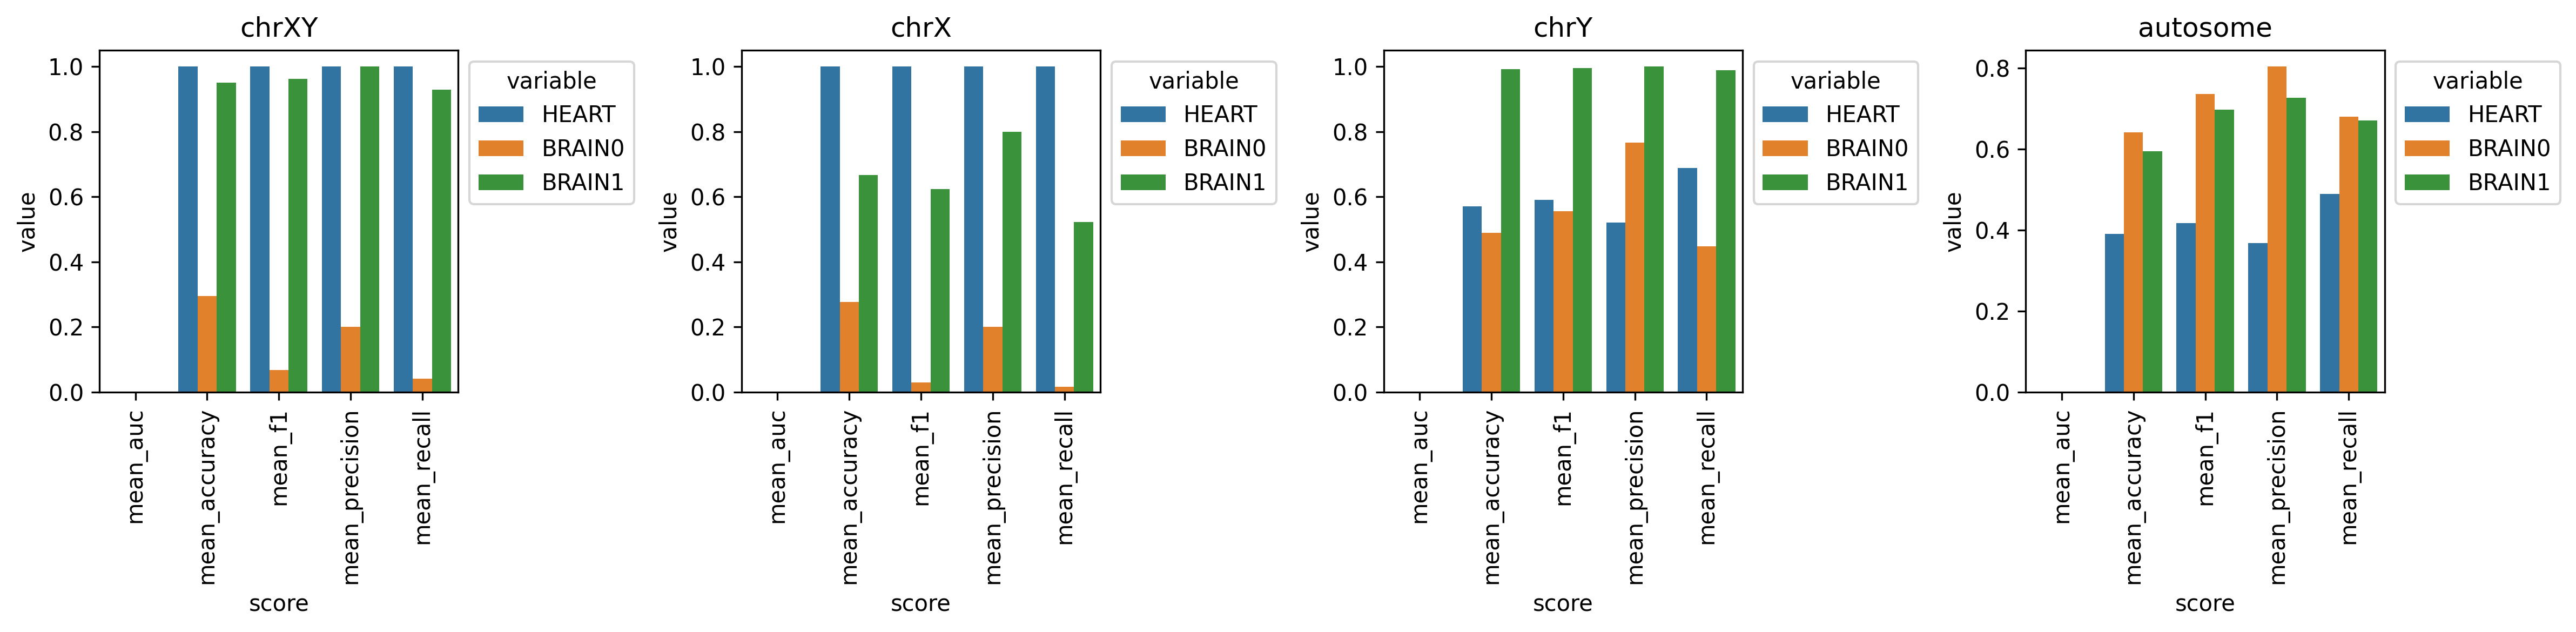

In [13]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

chromosome = 'chrXY'
for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 3)), 
        columns=('HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['HEART']=HEART_eval_df_50[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_eval_df_50[chromosome]
    dset['BRAIN1']=BRAIN1_eval_df_50[chromosome]

    dset['score'] = dset.index


    sns.barplot(dset.melt('score'), x='score', y='value', hue='variable',
                ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(chromosome)
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')